## Connected Component Analysis 기반의 Light Reflectance Detection

In [142]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from skimage import measure

### 1. Import dataset

In [7]:
path = '../dataset/'
safe_filenames = [i for i in os.listdir(path) if 'safe' in i]
sink_filenames = [i for i in os.listdir(path) if 'sink' in i]

In [143]:
safe_path = os.path.join(path, safe_filenames[2])
sink_path = os.path.join(path, sink_filenames[2])

### 2. Image Processing

(338, 601)


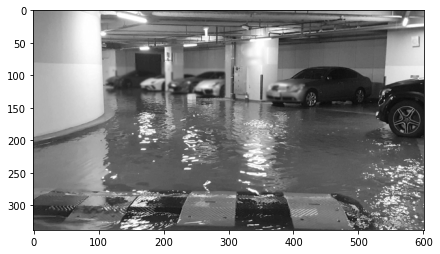

In [43]:
img = cv2.imread(sample_path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray_img.shape)

# 1. 일반 이미지
plt.figure(figsize=(7,7))
plt.imshow(gray_img, cmap='gray')

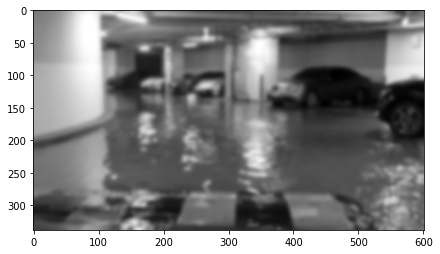

In [44]:
# 2. Gaussian Filter
blur_val = 17
blurred_img = cv2.GaussianBlur(gray_img, (blur_val,blur_val), 0)

plt.figure(figsize=(7,7))
plt.imshow(blurred_img, cmap='gray')

### 3. Morphology

- 영상의 밝은 부분을 강조하기 위해 사용함

morphed_img:  (338, 601)


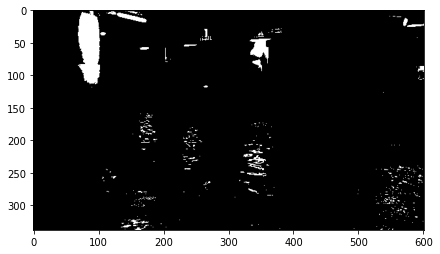

In [49]:
# 240-255 사이 px 값만 놔둠
morphed_img = cv2.threshold(gray_img, 240, 255, cv2.THRESH_BINARY)[1]

print('morphed_img: ', morphed_img.shape)
plt.figure(figsize=(7,7))
plt.imshow(morphed_img, cmap='gray')

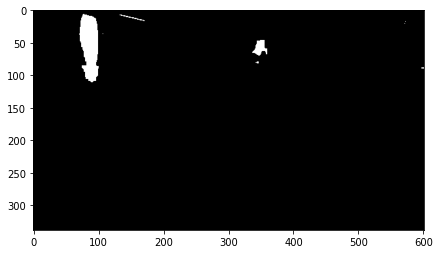

In [54]:
# 1. Erosion -> 침식: 큰 component를 작게 보기 위해서 검은 픽셀 주위를 0으로 만들어줌
dialated_img = cv2.erode(morphed_img, None, iterations=2)

plt.figure(figsize=(7,7))
plt.imshow(dialated_img, cmap='gray')

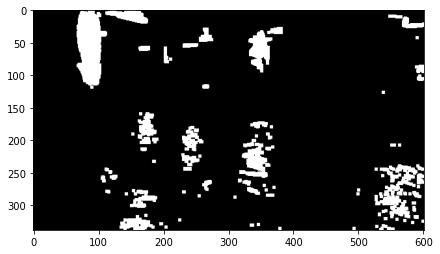

In [56]:
# 2. Dilate -> 팽창: 흰 픽셀 주위도 1로 만들어줌
eroded_img = cv2.dilate(morphed_img, None, iterations=2)

plt.figure(figsize=(7,7))
plt.imshow(eroded_img, cmap='gray')

### 4.  Conneced Component Analysis

In [68]:
# a. 연속된 component에 label 붙여주기
labels = measure.label(morphed_img, neighbors=8, background=0)
print('Unique Components are: ', str(len(np.unique(labels))))

# labels: 각 component의 라벨이 달린 이미지 shape이 나옴

px_list = list()
for label in np.unique(labels):
    
    if label == 0:
        continue # background 이므로
        
    else:
        labelMask = np.zeros(morphed_img.shape, dtype='uint8')
        labelMask[labels==label] = 255
        
        num_px = cv2.countNonZero(labelMask)
        #print('num_px: ', num_px)
        
        px_list.append(num_px)
        
#px_list

Unique Components are:  357


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2
  


### 5. Function

In [139]:
def path_to_pxlist(target_path, neighbor_val):
    
    # 1. read image and convert it to grayscale
    img = cv2.imread(target_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    blur_val = 17
    blurred_img = cv2.GaussianBlur(gray_img, (blur_val,blur_val), 0)
    
    # 2. morphology
    morphed_img = cv2.threshold(blurred_img, 240, 255, cv2.THRESH_BINARY)[1]
    
    # 3. CCA
    # a. 연속된 component에 label 붙여주기
    labels = measure.label(morphed_img, neighbors=neighbor_val, background=0)
    #print('Unique Components are: ', str(len(np.unique(labels))))

    # labels: 각 component의 라벨이 달린 이미지 shape이 나옴
    mask = np.zeros(morphed_img.shape, dtype='uint8')
    px_list = list()
    
    total_px = gray_img.shape[0]*gray_img.shape[1]
    print('total_px: ', total_px)
    
    for label in np.unique(labels):

        if label == 0:
            continue # background 이므로

        else:
            labelMask = np.zeros(morphed_img.shape, dtype='uint8')
            labelMask[labels==label] = 255

            num_px = cv2.countNonZero(labelMask)
            #print('num_px: ', num_px)
            
            #if num_px < 50:
            px_list.append(num_px/total_px)
            px_list = [i for i in px_list if i < 0.0002]
            
            mask = cv2.add(mask, labelMask)

    
    return gray_img, morphed_img, px_list, mask

### 6. Analysis

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2
  from ipykernel import kernelapp as app


total_px:  480000


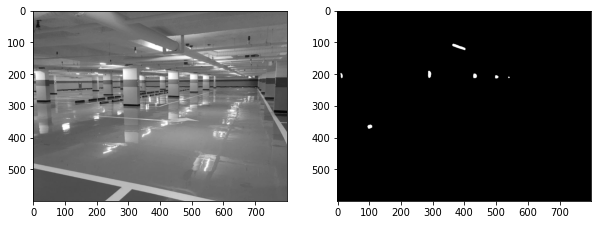

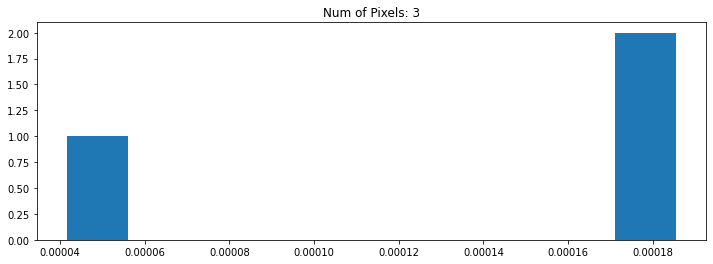

total_px:  205800


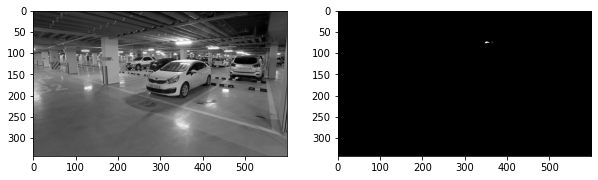

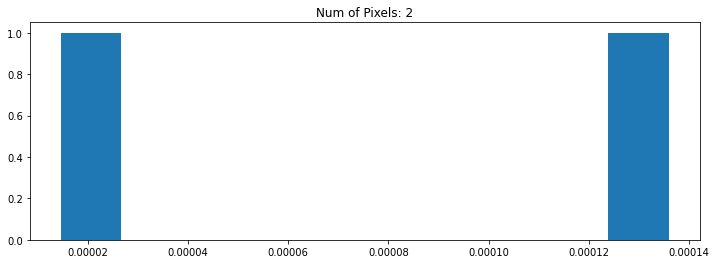

total_px:  159744


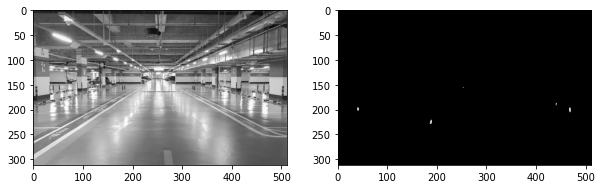

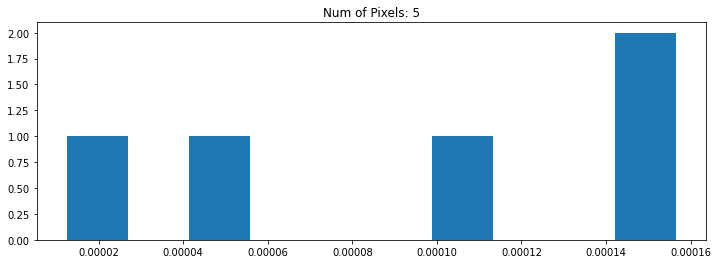

total_px:  500000


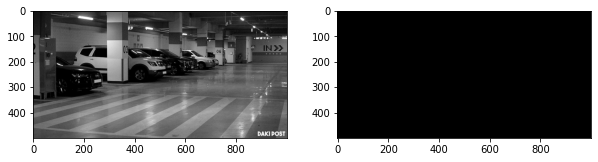

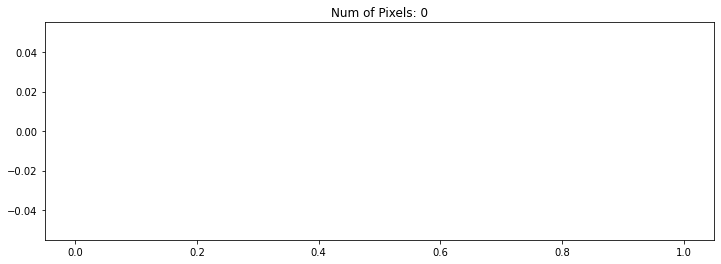

total_px:  960000


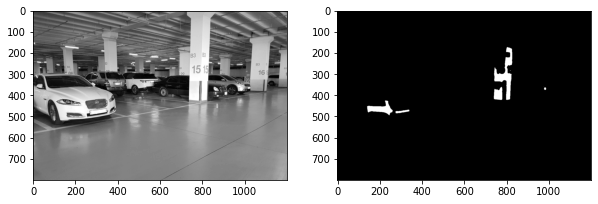

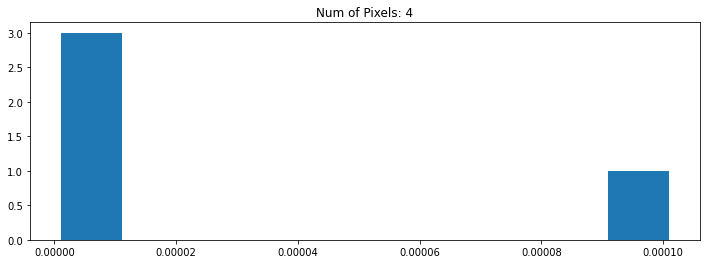

In [140]:
# safe
for filename in safe_filenames:
    safe_path = os.path.join(path, filename)
    gray_safe, morphed_safe, px_safe, mask_safe = path_to_pxlist(safe_path, 8)
        
    plt.figure(figsize=(10,10))
    plt.subplot(121)
    plt.imshow(gray_safe, cmap='gray')

    plt.subplot(122)
    plt.imshow(mask_safe, cmap='gray')

    plt.show()

    plt.figure(figsize=(12,4))
    plt.title('Num of Pixels: ' + str(len(px_safe)))
    plt.hist(px_safe)
    plt.show()
    
    print('=========================')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=4, use connectivity=1
  from ipykernel import kernelapp as app


total_px:  888536


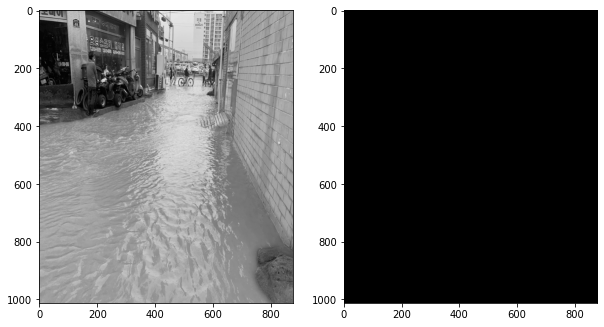

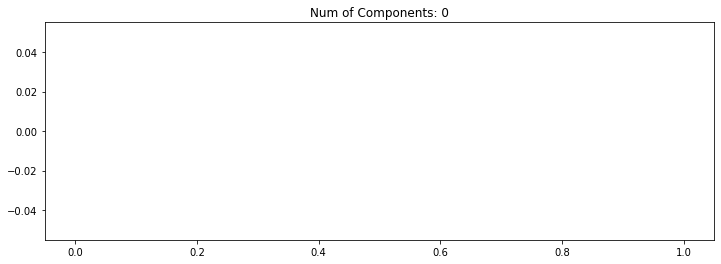

total_px:  733584


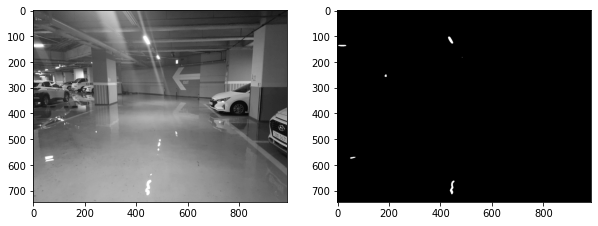

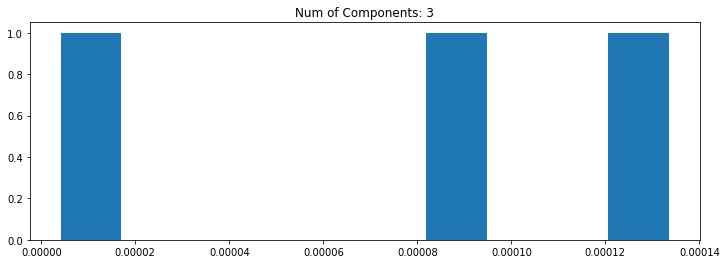

total_px:  203138


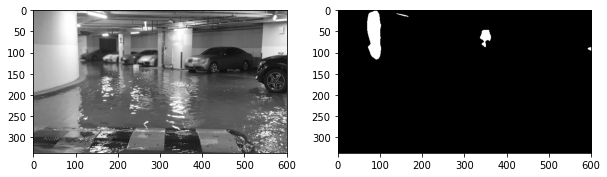

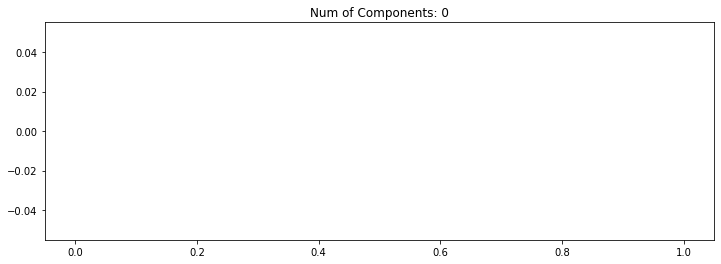

total_px:  176400


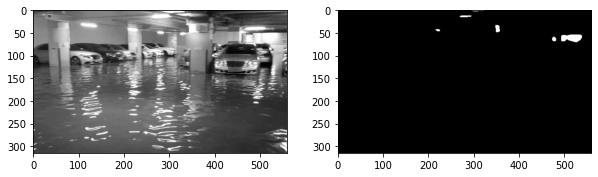

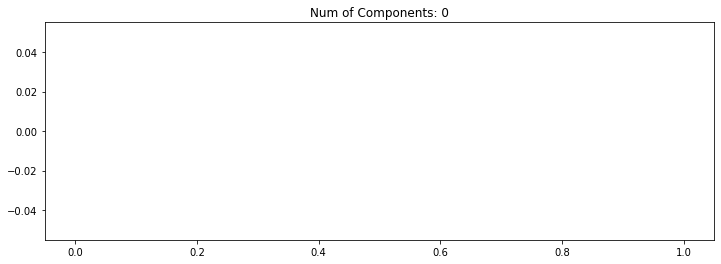

total_px:  960000


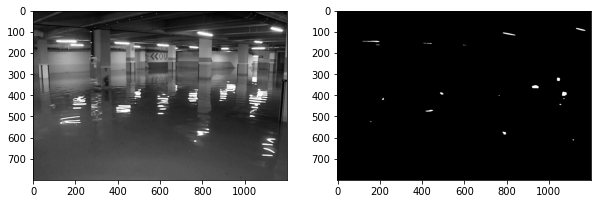

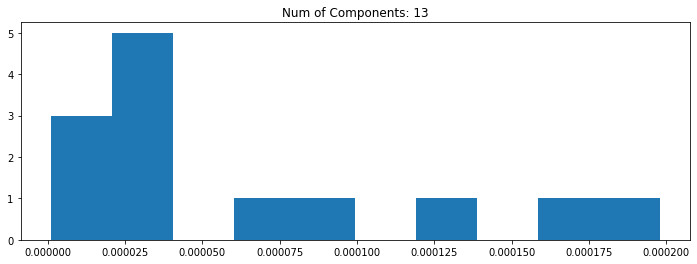

total_px:  165336


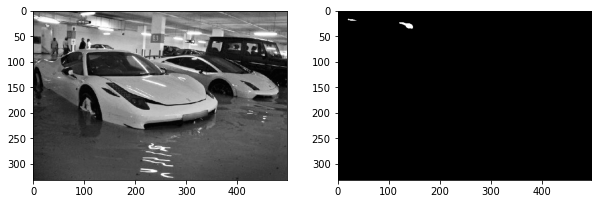

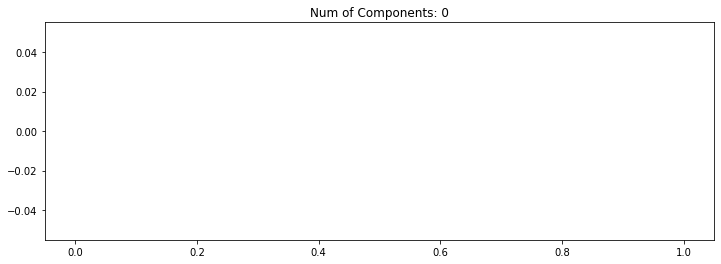

total_px:  1228800


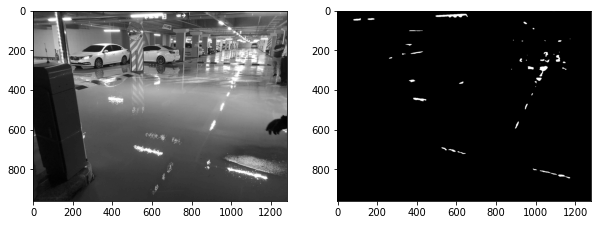

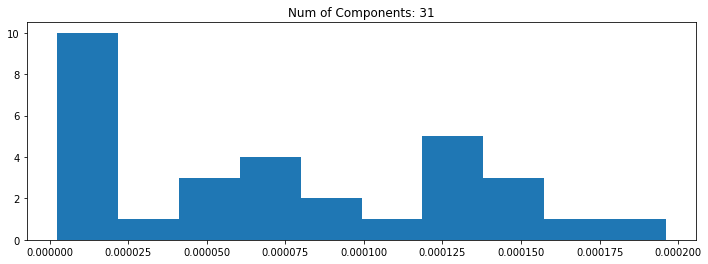

total_px:  1315256


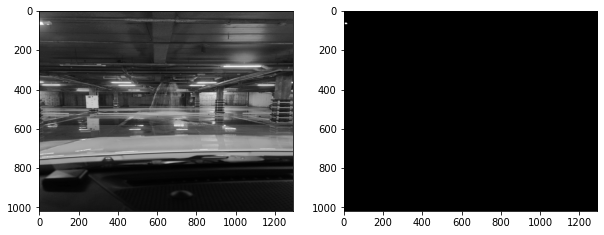

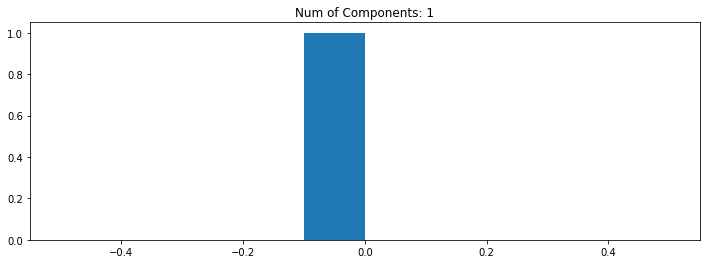

total_px:  1317624


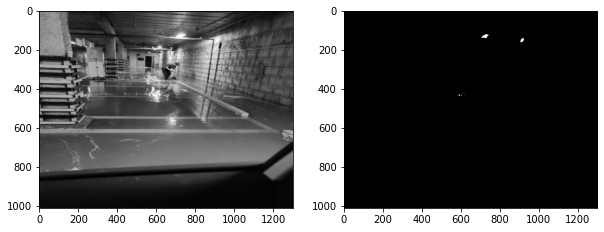

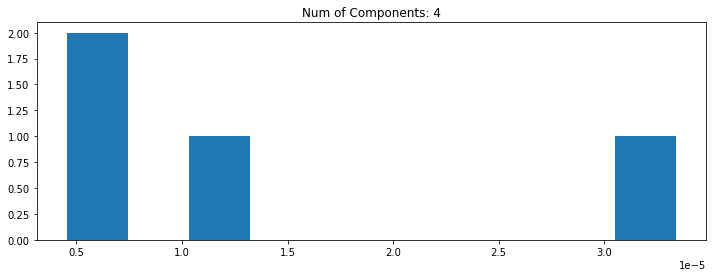

In [141]:
# sink
for filename in sink_filenames:
    sink_path = os.path.join(path, filename)
    gray_sink, morphed_sink, px_sink, mask_sink = path_to_pxlist(sink_path, 4)
    
    plt.figure(figsize=(10,10))
    plt.subplot(121)
    plt.imshow(gray_sink, cmap='gray')

    plt.subplot(122)
    plt.imshow(mask_sink, cmap='gray')
    plt.show()

    plt.figure(figsize=(12,4))
    plt.title('Num of Components: '+ str(len(px_sink)))
    plt.hist(px_sink)
    plt.show()
    
    print('=========================')